In [ ]:
import numpy as np #инструмент для работы с многомерными массивами с возможностью векторизации вычислений
import pandas as pd #удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц
import matplotlib.pyplot as plt #графики

In [ ]:
df2 = pd.read_csv("/content/DataSet1_3.csv", sep=",")
df2['Date'] = pd.to_datetime(df2['Date'])
df2

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...,...
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL


In [ ]:
n1=150
n2=300
n3 = 350
sdvig = 1 #количество строк для сдвига 

#предсказываем параметр Close следующего дня по параметрам Date Open Volume High предшествующего дня 
#делю на тестовую и тренировучную выборки
X_train = df2[['Date','Open','Volume','High']][n1:n2] #много параметров
X_train['Date'] = pd.to_numeric(X_train['Date'])
y_train = df2[['Close']].shift(sdvig)[n1:n2] #делаем сдвиг всех значений колонки на 1 строку назад

X_test = df2[['Date','Open','Volume','High']][n2:n3] #много параметров
X_test['Date'] = pd.to_numeric(X_test['Date'])
y_test = df2[['Close']].shift(sdvig)[n2:n3] #делаем сдвиг всех значений колонки на 1 строку назад

# МНК

In [ ]:
#создаю модель, учу 
from sklearn import linear_model 
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train) 

LinearRegression()

In [ ]:
#получаю предсказанные значения
y_pred = reg.predict(X_test)

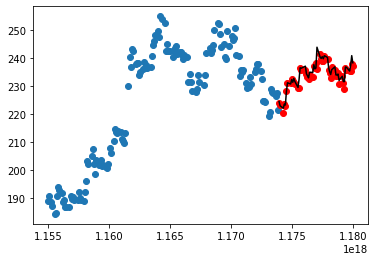

In [ ]:
#сравниваем визуально предсказанные и реальные данные
plt.plot(X_train['Date'],y_train,'o')
plt.plot(X_test['Date'],y_test,'o',color = 'red')
plt.plot(X_test['Date'],y_pred, color ='black')
plt.show()

In [ ]:
#оцениваем
from sklearn import metrics 
metrics.mean_squared_error(y_test,y_pred) #MSE метрика, чем меньше, тем лучше

2.4446028862856135

**Хи квадрат**, проверяет:
*   h0: данные ожидаемые данные не протеворечат реальным 
*   h1: протеворечат
<br>Если p-value больше 0,05 то H0, если меньше H1

Чем меньше само число критерия хи квадрат, тем ближе ожидание к реальным

In [ ]:
from  scipy.stats import chi2_contingency #хи квадрат
chi2, p, dof, ex = chi2_contingency([y_test,y_pred])
print(chi2,p)

0.2006946788291653 1.0


**T-критерий Стьюдента**
<br>Это тест на нулевую гипотезу о том, что 2 независимых образца имеют одинаковые средние значения.

In [ ]:
from scipy.stats import ttest_ind #t критерий Стьюдента
stat, p = ttest_ind(y_test,y_pred)
print(p)

[0.45093362]


**Z-тест Фишера**
<br>H0: средние равны
<br> H1: неравны

In [ ]:
from statsmodels.stats import weightstats #z-тест Фишера
stat, p = weightstats.ztest(y_test,y_pred)
print(p)

[0.44911775]


# LASSO

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.5)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.970e+02, tolerance: 6.590e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.5)

In [ ]:
y_pred = pd.DataFrame()
y_pred['y_pred'] = pd.DataFrame(clf.predict(X_test))

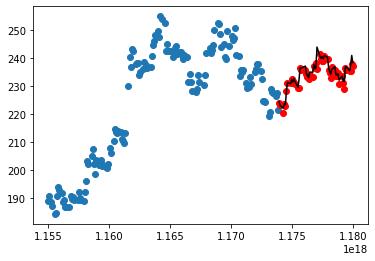

In [ ]:
plt.plot(X_train['Date'],y_train,'o')
plt.plot(X_test['Date'],y_test,'o',color = 'red')
plt.plot(X_test['Date'],y_pred, color ='black')
plt.show()

In [ ]:
from sklearn import metrics 
metrics.mean_squared_error(y_test,y_pred) #MSE метрика, чем меньше, тем лучше

2.5363587003294286

In [ ]:
from  scipy.stats import chi2_contingency #Статистика хи квадрат
chi2, p, dof, ex = chi2_contingency([y_test,y_pred])
print(chi2,p)

0.2006642431022123 1.0


In [ ]:
from scipy.stats import ttest_ind #t критерий Стьюдента
stat, p = ttest_ind(y_test,y_pred)
print(p)

[0.41441288]


In [ ]:
from statsmodels.stats import weightstats #z-тест Фишера
stat, p = weightstats.ztest(y_test,y_pred)
print(p)

[0.41242393]


# Ridge

In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=1.0)
rdg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.38012e-32): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [ ]:
y_pred = rdg.predict(X_test)

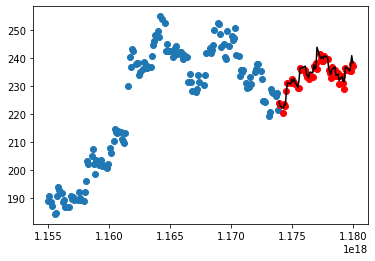

In [ ]:
plt.plot(X_train['Date'],y_train,'o')
plt.plot(X_test['Date'],y_test,'o',color = 'red')
plt.plot(X_test['Date'],y_pred, color ='black')
plt.show()

In [ ]:
from sklearn import metrics 
metrics.mean_squared_error(y_test,y_pred) #MSE метрика, чем меньше, тем лучше

2.4445648210415887

In [ ]:
from  scipy.stats import chi2_contingency #хи квадрат
chi2, p, dof, ex = chi2_contingency([y_test,y_pred])
print(chi2, p)

0.20059656341125232 1.0


In [ ]:
from scipy.stats import ttest_ind #t критерий Стьюдента
stat, p = ttest_ind(y_test,y_pred)
print(p)

[0.45050961]


In [ ]:
from statsmodels.stats import weightstats #z-тест Фишера
stat, p = weightstats.ztest(y_test,y_pred)
print(p)

[0.44869177]
